In [1]:
#A list of libraries to help explain and illustrate the following exercise
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#We'll be using the iris dataset in the seaborn library to illustrate the statistics terms
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


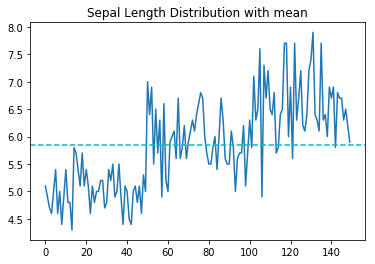

The mean of the sepal lengths is : 5.84


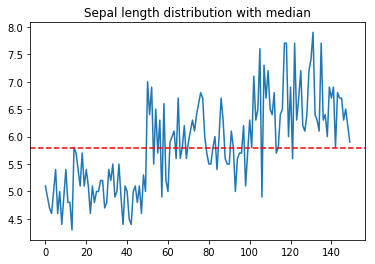

The median of the sepal lengths is : 5.8


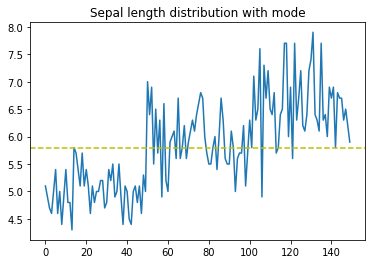

The mode of the sepal lengths is : 5.0
The range of sepal length in iris dataset is: 4.3  to  7.9
The std deviation of the sepal lengths in iris dataset is  0.83
The variance of the sepal lengths in iris dataset is  0.69


In [3]:
# Day 1 Onboarding Exercise
# 1. Terms in Statistics
#a. Mean: It is one of the measured to find the central tendency of data. It is calulated as sum of all the values
#     by the number of points in the data.
#Formula: sum(Ni)/n

mean = data.sepal_length.mean()

#The mean here shows the average sepal lengths in the iris dataset.


X = data["sepal_length"]
plt.plot(X)

plt.axhline(X.mean(),linestyle='dashed',color='c')
plt.title("Sepal Length Distribution with mean")

plt.show()
print("The mean of the sepal lengths is :",round(mean,2))
#b. Median: Value that falls at the midpoint of the frequency distribution. It is used to separate the upper half
# and the lower half of the frequency distribution.
# *** When the data has many outliers or max or min values having extreme values, median gives a better idea of central
# tendency than mean
median = X.median()

plt.plot(X)
plt.axhline(X.median(),linestyle='dashed',color='r')
plt.title("Sepal length distribution with median")
plt.show()
print("The median of the sepal lengths is :",median)
#The mean here shows the average sepal lengths in the iris dataset.

#c. Mode: It is the most commonly observed value in a dataset. 
mode = X.mode()[0]

plt.plot(X)
plt.axhline(X.median(),linestyle='dashed',color='y')
plt.title("Sepal length distribution with mode")
plt.show()
print("The mode of the sepal lengths is :",mode)

#d. Range: The values whithin which all the datapoints are contained
print("The range of sepal length in iris dataset is:",min(X)," to ",max(X))

#e. Standard Deviation: It measures how much the data is dispersed in the dataset. Low Std. Deviation means data points are 
#closer to the mean of the dataset.
#*** Standard error is derived from Standard Deviation. If a certain experiment was to be conducted multiple times,
# a standard error would be how much the results would deviate from the mean of the results.
#Formula : sq. root( sum((x - xbar)**2)/n )
std = X.std()
print("The std deviation of the sepal lengths in iris dataset is ",round(std,2))

#f. Variance: It also measures how much the data is dispersed in the dataset.It is the squared deviation from the mean.
#Formula :  sum((x - xbar)**2)/n
var = X.var()
print("The variance of the sepal lengths in iris dataset is ",round(var,2))

# 1.2 Population Vs. Sample
## Population : It contains all the members of the dataset
Sample : It is a subset of the population. 
Sample is generally used to get a basic idea of the data or perform primitive analysis on data when the datasets are very
large.
## If the data is available for the whole population mean, median, mode, std and variance are calculated on the population.
eg: If mean height of a class is asked it can be calculated easily. If mean height of all the people in the world is asked it
 is advisable to take the median of a sample that generalizes the population.

# 1.3 Chebyshev’s Theorem
The minimum poportion of the data you expect to find in the range of two standard deviations from the mean.
Mathematically, no more than 1/k2 of the distribution's values can be more than k standard deviations away from the mean.

# 1.4 Central Limit Theorem
For a population, if random sample size of n are taken at a time, when n is significantly large the distribution of the
means of the sample reaches a normal distribution
## Formula: $ xbar = std. dev/(sq.root n) $



# 2 Probability Distributions
## 2.1 Discrete Distributions: 
Probability of occurance of each random variable.


Text(0.5, 1.0, 'Discrete distribution of sepal lengths')

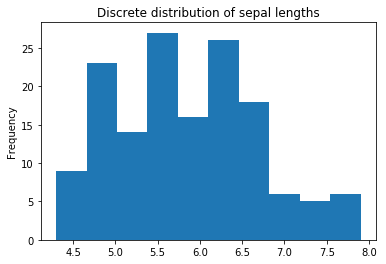

In [31]:
X.plot.hist()
plt.title("Discrete distribution of sepal lengths")

Text(0.5, 0, 'Sepal_length')

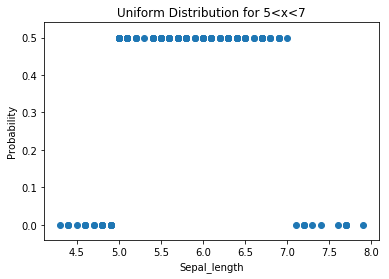

In [7]:
#a. Uniform distribution: A distribution that has a constant probability
dic = {"sepal_l":X}
X_uniform=pd.DataFrame(dic)
a=5.0
b=7.0
X_uniform["Probability"]=0
# X_uniform.loc[X_uniform["sepal_l"]<a,'Probability'] =0
X_uniform.loc[(X_uniform["sepal_l"]>=a) & (X_uniform["sepal_l"]<=b) ,'Probability'] =1/(b-a)
# X_uniform.loc[X_uniform["sepal_l"]>b,'Probability']=0
plt.scatter(X_uniform.sepal_l,X_uniform.Probability)
plt.title("Uniform Distribution for 5<x<7")
plt.ylabel("Probability")
plt.xlabel("Sepal_length")

# b. Binomial Distribution:
In general, if the random variable X follows the binomial distribution with parameters n ∈ ℕ 
and p ∈ [0,1], we write X ~ B(n, p). The probability of getting exactly k successes in n trials
 is given by the probability mass function:
## f(k,n,p) = nCk*(p**k)*((i-p)**n-k)


In [ ]:
from scipy.stats import binom
import seaborn as sns

binom.rvs(size=10,n=20,p=0.8)

data_binom = binom.rvs(n=20,p=0.8,loc=0,size=1000)
ax = sns.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')
#In the graph below if n=20, the probability of the success of the subsequent numbers is shown in the graph below:

# c. Poisson Distribution
A discrete probability distribution that expresses the probability of a given number of events
occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time
since the last event.


- The average number of events in an interval is designated λ (lambda).λ is the event rate, also called the rate parameter. The probability of observing k events in an interval is given by the equation
    $ P = e^-λ((λ^-k)/k!) $
     λ is the average number of events in an interval
     k is the number of occurrences


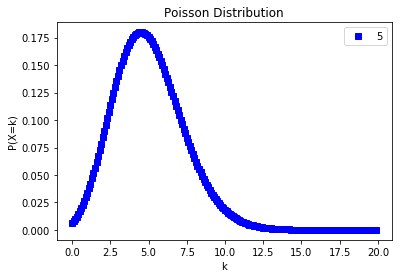

In [32]:
from scipy.stats import poisson
from scipy.special import factorial

t = np.arange(0, 20, 0.1)
d = np.exp(-5)*np.power(5, t)/factorial(t)

plt.plot(t, d, 'bs')
plt.title('Poisson Distribution')
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.legend('5')
plt.show()

# 2.2 Continuous Probability Distribution
If the random variable is a continuous variable then it's probability 
distribution is a continous distribution.

## a. Uniform Continuous Distribution
For each member of the family, all intervals of the same length on the distribution's
 support are equally probable. 
The support is defined by the two parameters, a and b, which are its minimum and maximum values.

Text(0.5, 0, 'Sepal_length')

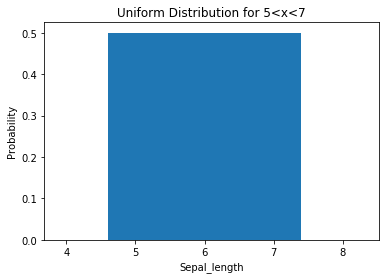

In [33]:
dic = {"sepal_l":X}
X_uniform=pd.DataFrame(dic)
a=5.0
b=7.0
X_uniform["Probability"]=0
# X_uniform.loc[X_uniform["sepal_l"]<a,'Probability'] =0
X_uniform.loc[(X_uniform["sepal_l"]>=a) & (X_uniform["sepal_l"]<=b) ,'Probability'] =1/(b-a)
# X_uniform.loc[X_uniform["sepal_l"]>b,'Probability']=0

plt.bar(X_uniform.sepal_l,X_uniform.Probability)
plt.title("Uniform Distribution for 5<x<7")
plt.ylabel("Probability")
plt.xlabel("Sepal_length")

## b. Gamma Distribution:
Source: http://wiki.stat.ucla.edu/socr/index.php/AP_Statistics_Curriculum_2007_Gamma
## Definition: 
Gamma distribution is a distribution that arises naturally in processes for which the waiting times
between events are relevant. It can be thought of as a waiting time between Poisson distributed events. 
## Example:
Suppose you are fishing and you expect to get a fish once every 1/2 hour.
Compute the probability that you will have to wait between 2 to 4 hours before you catch 4 fish. 
One fish every 1/2 hour means we would expect to get θ = 1 / 0.5 = 2 fish every hour on average.
Using θ = 2 and k = 4, we can compute this using gamma distribution


# Special Cases of Gamma Distribution
## 1. Normal Distribution:
 Normal Distribution is a very common continuous probability distribution. Normal distributions are important in statistics
 to represent real-valued random variables whose distributions are not known. A random variable with a Gaussian distribution
 is said to be normally distributed and is called a normal deviate. 


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

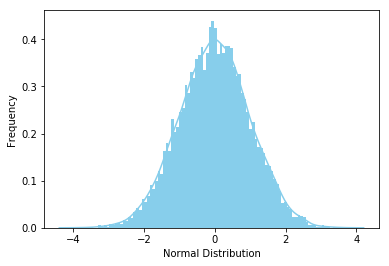

In [27]:


from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

# 2. Exponential distribution:
The exponential distribution is the probability distribution of the time between events in a Poisson point process,
i.e., a process in which events occur continuously and independently at a constant average rate. 
It is a particular case of the gamma distribution. It is the continuous analogue of the geometric distribution,
and it has the key property of being memoryless. 
In addition to being used for the analysis of Poisson point processes it is found in various other contexts.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

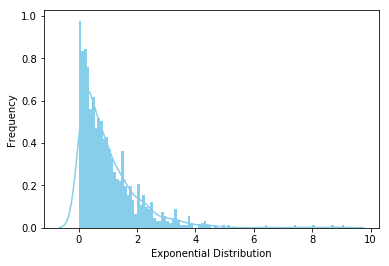

In [28]:

from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

# 3.Chi-squared distribution
- Chi-squared distribution(also chi-square or χ2-distribution) with k degrees of freedom is the distribution of a sum 
     of the squares of k independent standard normal random variables.
- The chi-squared distribution is a special case of the gamma distribution and is one of the most widely used probability distributions in inferential statistics,notably in hypothesis testing or in construction of confidence      intervals.
- When it is being distinguished from the more general noncentral chi-squared distribution, this distribution is sometimes
    called the central chi-squared distribution

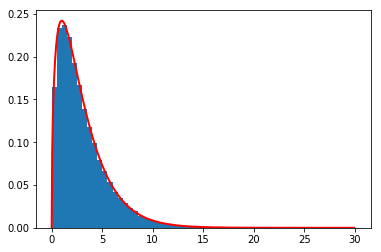

In [34]:

import scipy.stats as stats


norm = stats.norm(0, 1)

x1 = norm.rvs(size=100000)**2
x2 = norm.rvs(size=100000)**2
x3 = norm.rvs(size=100000)**2

f = x1 + x2 + x3

plt.hist(f, 60, density=True)

# Plot the theoretical density of f
x = np.arange(0, 30, .05)
plt.plot(x, stats.chi2.pdf(x, df=3), color='r', lw=2)
plt.show()

# 3. Probability
## 3.1 Bayes Theorem:
- The theorem provides a way to revise existing predictions or theories (update probabilities) given new or additional evidence.
Formula: $ P(A|B) = P(A)*P(B|A)/P(B) $


# 4. Understanding variables
## 4.1 Types of variables:
### a. Continuous Variable VS Discrete Variable:
If an variable can take any real value between two real values it is called as continuous variable else it is called as a discrete variable
### b. Random variable
A variable whose value depends on the output of a random phenomenon
### c. Categorical Variable
A variable than can take one of the fixed number of possible values.



## 4.2 (a) Confidence intervals
Confidence interval (CI) is a type of interval estimate, computed from the statistics of the observed data,
that might contain the true value of an unknown population parameter. The interval has an associated confidence level that, 
loosely speaking, quantifies the level of confidence that the parameter lies in the interval.

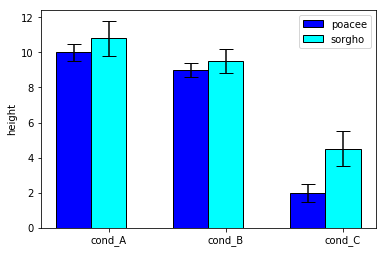

In [14]:


#Generally the confidence level is 95%.
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [10, 9, 2]
 
# Choose the height of the cyan bars
bars2 = [10.8, 9.5, 4.5]
 
# Choose the height of the error bars (bars1)
yer1 = [0.5, 0.4, 0.5]
 
# Choose the height of the error bars (bars2)
yer2 = [1, 0.7, 1]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='sorgho')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()

## 4.2 (b) Significance Testing
Source: http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm
- Once sample data has been gathered through an observational study or experiment, statistical inference allows analysts to assess evidence in favor or some claim about the population from which the sample has been drawn.
- The methods of inference used to support or reject claims based on sample data are known as tests of significance. 

- Once null and alternative hypotheses have been formulated for a particular claim, the next step is to compute a test statistic.
- For claims about a population mean from a population with a normal distribution or for any sample with large sample size n (for which the sample mean will follow a normal distribution by the Central Limit Theorem), if the standard deviation  is known, the appropriate significance test is known as the z-test, where the test statistic is defined as $ z = (xbar - muknot)/sigma/root(n)$ .

- The test statistic z is used to compute the P-value for the standard normal distribution, the probability that a value at least as extreme as the test statistic would be observed under the null hypothesis.


## 4.3 Comparing distrtibutions
### a.T-test:
- A T test allows us to compare the means of two groups and determine how likely the difference between the two means occurred by chance when there is no difference in population from which the sample was drawn.

The calculations of a t test requires three pieces of information:
 - the difference between the means
 - The std dev of each group
 - no of subjects in each group

#### Points to consider
- Given the same difference in means, lower std deviation means more difference than the groups with higher std dev
- Smaller std have less overlaps than higher std devs
- More the subjects in the study more confident we are about the results of the test.

#### 3 Types of T test
1. Correlated/ Paired T test: The tests are run on the same people ( like before the test and after the test).Or people with similar characteristics are taken like mother-daughter, siblings

2. Equal Variance T test: When n is same or the variance is same

3. Seperate Variance T test: When n is different AND variance is different.


### b. Kolmogorov–Smirnov
Kolmogorov–Smirnov test is a nonparametric test of the equality of continuous,one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution. 
The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples.



## 4.4 ANOVA
Analysis of Variance (ANOVA) is a statistical method used to test differences between two or more means.
An ANOVA test is a way to find out if survey or experiment results are significant.
In other words, they help you to figure out if you need to reject the null hypothesis or accept the alternate hypothesis.
Basically, you’re testing groups to see if there’s a difference between them.
One-way or two-way refers to the number of independent variables (IVs) in your Analysis of Variance test. 
One-way has one independent variable (with 2 levels) and two-way has two independent variables (can have multiple levels).
For example, a one-way Analysis of Variance could have one IV (brand of cereal) and a two-way Analysis of Variance has two 
 IVs (brand of cereal, calories).


## 4.5 Correlation and Covariance
### a. Correlation
- Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. 
- A positive correlation indicates the extent to which those variables increase or decrease in parallel.
-  A negative correlation indicates the extent to which one variable increases as the other decreases.

In [35]:
data.corr()
#The below correlation matrix shows that for the iris dataset the petal_length and petal_width are highly correlated.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### b. Covariance: 
- Covariance is a measure of the relationship between two random variables. 
- The metric evaluates how much – to what extent – the variables change together.
- In other words, it is essentially a measure of the variance between two variables (note that the variance of one variable equals the variance of the other variable). 
- However, the metric does not assess the dependency between variables.

 Formula: $ cov = sigma((xi-xbar)(yi-ybar))/n $


-  Covariance measures the total variation of two random variables from their expected values. Using covariance, we can only gauge the direction of the relationship (whether the variables tend to move in tandem or show an inverse relationship). However, it does not indicate the strength of the relationship, nor the dependency between the variables.
-  On the other hand, correlation measures the strength of the relationship between variables.
-  Correlation is the scaled measure of covariance. It is dimensionless.
-  In other words, the correlation coefficient is always a pure value and not measured in any units.

In [36]:
data.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [25]:
#Matrix Operations
import numpy
# Two matrices are initialized by value
x = numpy.matrix([[1, 2], [4, 5]])
y = numpy.matrix([[7, 8], [9, 10]])
#  add()is used to add matrices
print ("Addition of two matrices: ")
print (numpy.add(x,y))
# subtract()is used to subtract matrices
print ("Subtraction of two matrices : ")
print (numpy.subtract(x,y))
# divide()is used to divide matrices
print ("Matrix Division : ")
print (numpy.divide(x,y))
print ("Multiplication of two matrices: ")
print (numpy.multiply(x,y))
print ("The product of two matrices : ")
print (numpy.dot(x,y))
print ("square root is : ")
print (numpy.sqrt(x))
print ("The summation of elements : ")
print (numpy.sum(y))
print ("The column wise summation  : ")
print (numpy.sum(y,axis=0))
print ("The row wise summation: ")
print (numpy.sum(y,axis=1))
# using "T" to transpose the matrix
print ("Matrix transposition : ")
print (x.T)
print ("Matrix Inverse : ")
print (x.I)

Addition of two matrices: 
[[ 8 10]
 [13 15]]
Subtraction of two matrices : 
[[-6 -6]
 [-5 -5]]
Matrix Division : 
[[0.14285714 0.25      ]
 [0.44444444 0.5       ]]
Multiplication of two matrices: 
[[ 7 16]
 [36 50]]
The product of two matrices : 
[[25 28]
 [73 82]]
square root is : 
[[1.         1.41421356]
 [2.         2.23606798]]
The summation of elements : 
34
The column wise summation  : 
[[16 18]]
The row wise summation: 
[[15]
 [19]]
Matrix transposition : 
[[1 4]
 [2 5]]
Matrix Inverse : 
[[-1.66666667  0.66666667]
 [ 1.33333333 -0.33333333]]
